# Assumptions for Linear Regression

## Introduction

Like any other statistical technique, the coefficients and p-values of a linear regression model are based on underlying assumptions about the variables and the relationships between them. In this lesson, you will learn about these assumptions.

## Objectives

You will be able to:

- Explain why linear regression assumptions are important
- List the assumptions of linear regression

## Regression Assumptions and Model Diagnostics

When you fit a regression model, the algorithm will find a best fit line **according to how you have defined the model**. If the model is ill-defined, you will still get coefficients and p-values, but they might not actually describe the true relationship between the underlying variables.

For example, let's say you fit this model:

In [1]:
import numpy as np
import statsmodels.api as sm

X = np.linspace(1, 10).reshape(-1, 1)
y = np.exp(X)

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(f"""
Model p-value:   {results.f_pvalue}
Model R-Squared: {results.rsquared}
Coef p-value:    {results.pvalues[1]}
Coef value:      {results.params[1]}
""")


Model p-value:   5.120199680407874e-09
Model R-Squared: 0.5124264403042176
Coef p-value:    5.120199680407825e-09
Coef value:      1341.4381373622202



Ok, so you are explaining about 51% of the variance in `y`, and for each increase of 1 in `X` you see an associated increase of about 1.3k in `y`. The model overall and the coefficient for `X` are statistically significant.

Other than the fact that these are made-up variables, what's the problem here?

Well, let's look at the graph:

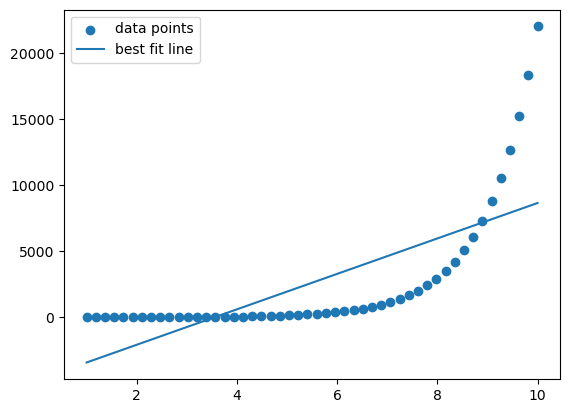

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X, y, label="data points")
ax.plot(X, results.predict(sm.add_constant(X)), label="best fit line")
ax.legend();

Just by looking at that graph, you can tell that this model is not actually a good fit for the data. The ordinary least squares algorithm found a line that would maximize the explained error, but that doesn't mean you would actually want to use this model for inference _or_ prediction.

Linear regression assumptions formalize the ways that a model can be "off" and give you tools beyond just visualization in order to diagnose the problem!

"What are the assumptions of linear regression?" is also a common technical interview question, so we recommend that you use the acronym LINE to remember them: **L**inearity, **I**ndependence, **N**ormality, **E**qual Variance (Homoscedasticity).

## 1. Linearity

> The linearity assumption requires that there is a **linear relationship** between the response variable (y) and predictor (X). Linear means that the change in y by 1-unit change in X, is constant. 


<img src="images/lin_2.png" width="800">

As shown above, if we try to fit a linear model to a non-linear data set, OLS will fail to capture the trend mathematically, resulting in an inaccurate relationship.

## 2. Independence

The independence assumption has two parts: independence of features and independence of errors.

### Independence of Features

> Independence of features means that we want to **avoid collinearity** between features in a multiple regression.

Collinearity means that the _features_ can be used to predict each other, which causes numerical problems for the regression algorithm and leads to unstable coefficients.

/Users/scarlettvalentin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/scarlettvalentin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/scarlettvalentin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


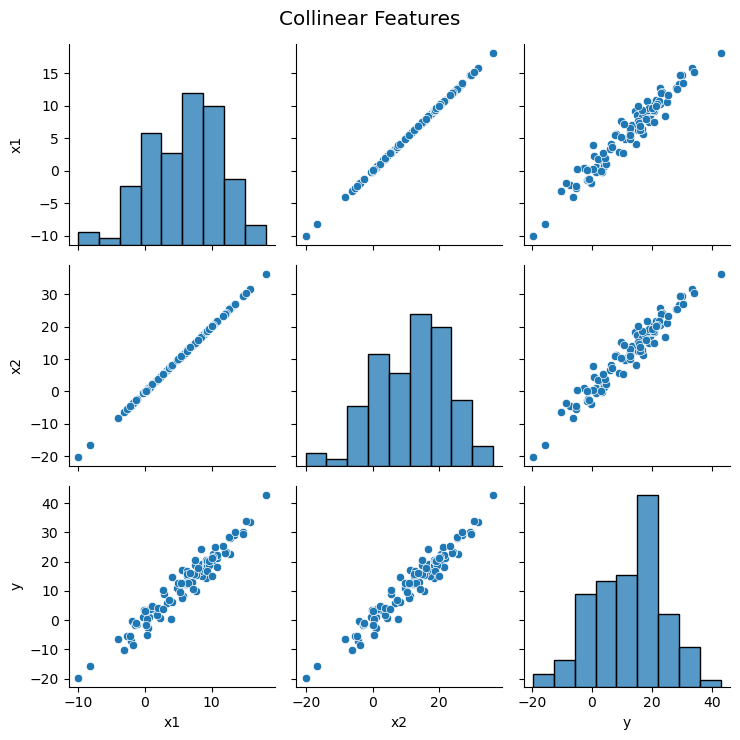

In [3]:
import seaborn as sns
import pandas as pd

np.random.seed(1)
df = pd.DataFrame()
df["x1"] = np.linspace(1, 10, 100) + np.random.normal(scale=5, size=100)
df["x2"] = df["x1"] * 2 # x2 is just a linear transformation of x1
df["y"] = df["x2"] + np.random.normal(scale=3, size=100)

plot = sns.pairplot(df)
plot.fig.suptitle("Collinear Features", fontsize="x-large")
plot.fig.tight_layout();

In addition to collinearity (where one predictor variable linearly predicts another), you also want to **avoid multicollinearity**. Multicollinearity means that multiple predictors can come together to linearly predict one of the predictors. This is more challenging to visualize but we will introduce numerical approaches to assess it.

### Independence of Errors

> Independence of errors means we want to **avoid autocorrelation** of errors. Autocorrelation means that a variable is correlated with itself, so that later values can be predicted based on previous values.

If a variable is autocorrelated then a _time series_ modeling approach is likely more appropriate than linear regression.

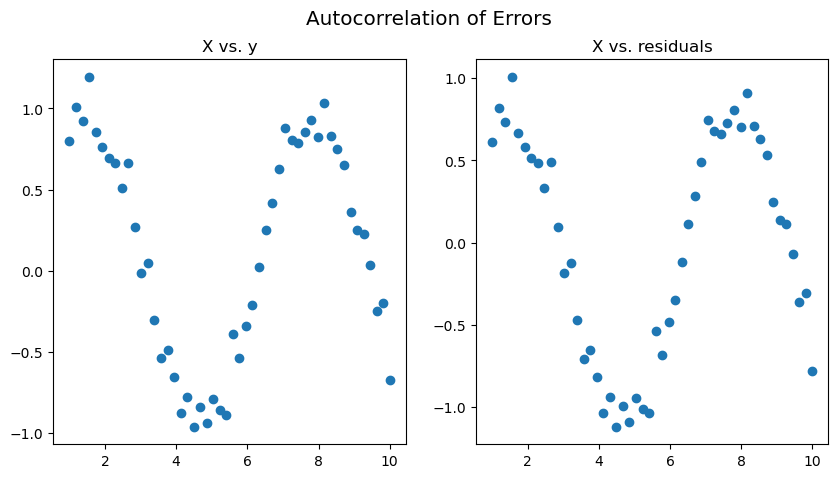

In [4]:
y = np.sin(X) + np.random.normal(scale=0.1, size=50).reshape(-1, 1)

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

fig, axes = plt.subplots(ncols=2, figsize=(10,5))
axes[0].scatter(X, y)
axes[0].set_title("X vs. y")
axes[1].scatter(X, y.reshape(1, -1) - results.predict(sm.add_constant(X)))
axes[1].set_title("X vs. residuals")
fig.suptitle("Autocorrelation of Errors", fontsize="x-large");

## 3. Normality 


> The normality assumption states that the **model residuals** should follow a normal distribution

Note that the normality assumption talks about the model residuals and _not_ about the distributions of the variables! In general, data scientists will often check the distributions of the variables as well.

<img src="images/inhouse_histo.png" width="800">

## 4. Equal Variance: Homoscedasticity 

> The equal variance (homoscedasticity) assumption states that we want to **avoid heteroscedasticity** of the errors

_Heteroscedasticity_ (also spelled heteroskedasticity) refers to the circumstance in which a variable's variability is unequal across the range of values of the predictor(s).

When there is heteroscedasticity in the data, a scatter plot of these variables will often create a cone-like shape. The scatter of the errors widens or narrows as the value of the independent variable increases. 

The inverse of heteroscedasticity is _homoscedasticity_, which indicates that a variable's variability is equal across values of the independent variable.

<img src="images/homo_2.png" width="700">

## Diagnostics with Residuals

Looking at the residuals is the single best way to flag potential violations of linear regression assumptions and figure out what to do about them. In the upcoming lessons you will learn more concrete approaches (e.g. statistical tests) that will tell you _whether_ an assumption is being met, but plotting residuals is likely to help you figure out _why_ this is happening.

Below are some general shapes of residual plots that you should be aware of:

<img src="images/prob_2.png" width="700">

## Summary 

Linear regression assumptions underpin the validity and reliability of your model. The algorithm will find _some_ coefficients and p-values, but their validity depends on the model being appropriately specified. The four assumptions can be remembered using the acronym LINE: linearity, independence, normality, and equal variance (homoscedasticity). In upcoming lessons we'll get into more detail about how to measure regression assumptions.